# Import library

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import emd
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Import data

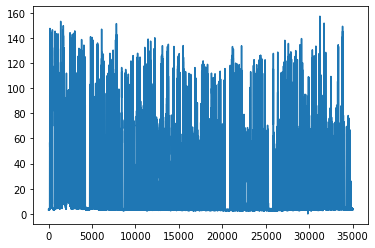

In [8]:
df = pd.read_csv('Steel_industry_data.csv')
load = df['Usage_kWh']
time = np.array(df['date'])

load.plot()
plt.show()


# Clean data and some explanatory data here

In [68]:
display(df.head())
other_vars = df.drop(columns = ['date', 'WeekStatus', 'Day_of_week', 'Load_Type', 'Usage_kWh'])
display(other_vars)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,2.95,0.00,0.0,73.21,100.00,900
1,4.46,0.00,0.0,66.77,100.00,1800
2,3.28,0.00,0.0,70.28,100.00,2700
3,3.56,0.00,0.0,68.09,100.00,3600
4,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800
35036,3.74,0.00,0.0,70.71,100.00,83700
35037,3.17,0.07,0.0,76.62,99.98,84600
35038,3.06,0.11,0.0,77.72,99.96,85500


# Split data 70 30

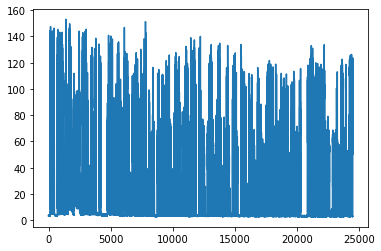

In [30]:
train = load[:int(len(load)*0.7)]
test = load[int(len(load)*0.7):]
plt.plot(train)
plt.show()

# ARIMA

In [31]:
from statsmodels.tsa.arima.model import ARIMA
 
# Build Model
arima = ARIMA(train, order=(2, 1, 2))  
arima_fit = arima.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Usage_kWh   No. Observations:                24528
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -100053.819
Date:                Thu, 12 May 2022   AIC                         200117.638
Time:                        21:52:46   BIC                         200158.176
Sample:                             0   HQIC                        200130.771
                              - 24528                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0178      0.027      0.666      0.506      -0.035       0.070
ar.L2          0.8043      0.024     32.838      0.000       0.756       0.852
ma.L1         -0.0967      0.025     -3.818      0.0

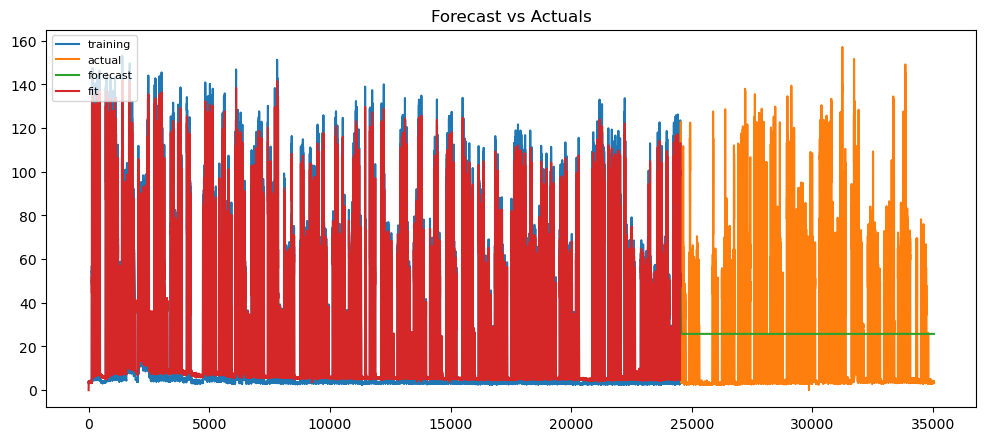

0         0.000000
1         3.169977
2         3.972313
3         3.219110
4         3.325429
           ...    
24523    48.515240
24524    51.776460
24525    47.271580
24526    49.335391
24527    53.032185
Name: predicted_mean, Length: 24528, dtype: float64


In [78]:
# plotting
fc = arima_fit.forecast(len(test)) 

# Make as pandas series
fc_series = pd.Series(fc, index = [x for x in range(len(train),len(train)+len(test))])
test_series = pd.Series(test, index = [x for x in range(len(train),len(train)+len(test))])
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test_series, label='actual')
plt.plot(fc_series, label='forecast')
plt.plot(arima_fit.predict(), label = 'fit')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(arima_fit.predict())

# Holt-Winter

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
holt_winter = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
print(holt_winter.summary())

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


                       ExponentialSmoothing Model Results                       
Dep. Variable:                Usage_kWh   No. Observations:                24528
Model:             ExponentialSmoothing   SSE                        5080841.799
Optimized:                         True   AIC                         130850.050
Trend:                         Additive   BIC                         130979.771
Seasonal:                      Additive   AICC                        130850.078
Seasonal Periods:                    12   Date:                 Thu, 12 May 2022
Box-Cox:                          False   Time:                         22:21:49
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9244344                alpha                 True
smoothing_trend          

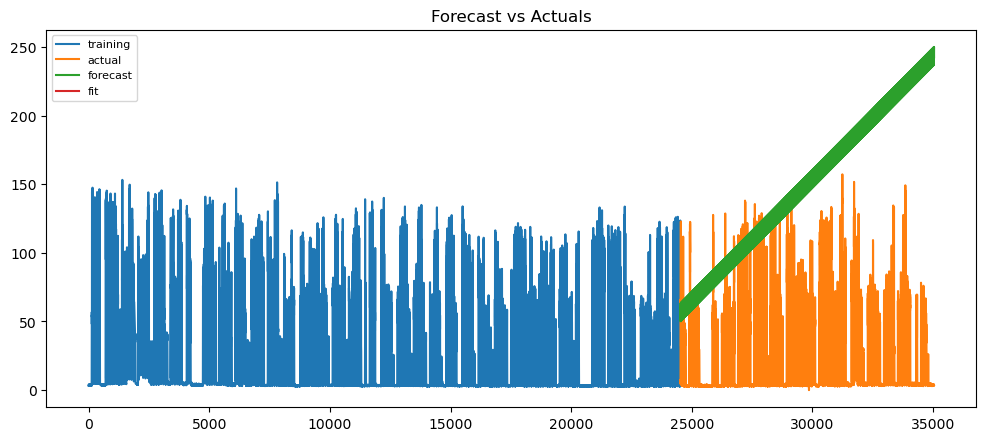

24528    50.256687
dtype: float64


In [80]:
hw = holt_winter.forecast(len(test)) 

# Make as pandas series
hw_series = pd.Series(hw, index = [x for x in range(len(train),len(train)+len(test))])
test_series = pd.Series(test, index = [x for x in range(len(train),len(train)+len(test))])
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test_series, label='actual')
plt.plot(hw_series, label='forecast')
plt.plot(holt_winter.predict(), label = 'fit')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(holt_winter.predict(len(train)))

# Simple Moving Average

In [ ]:
#6 unit
sma = train.rolling(window = 6).mean()
sma.plot()
print(sma)

# Empirical M Decomposition 

In [ ]:
import emd

imf = emd.sift.sift(np.array(train), imf_opts={'sd_thresh': 0.1})
emd.plotting.plot_imfs(imf, cmap=True, scale_y=True)

# SVR MODELS

In [72]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)
for i in range(1,12):
    df_train["lag{}".format(i)] = df_train["Usage_kWh"].shift(i)
    df_test["lag{}".format(i)] = df_test["Usage_kWh"].shift(i)
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
display(df_train, df_test)

,Usage_kWh,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11
0,3.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,4.00,3.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3.24,4.00,3.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3.31,3.24,4.00,3.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,3.82,3.31,3.24,4.00,3.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
24523,53.60,51.80,78.44,123.55,116.64,59.51,105.52,108.72,90.79,47.95,52.78,35.75
24524,50.33,53.60,51.80,78.44,123.55,116.64,59.51,105.52,108.72,90.79,47.95,52.78
24525,51.01,50.33,53.60,51.80,78.44,123.55,116.64,59.51,105.52,108.72,90.79,47.95
24526,56.45,51.01,50.33,53.60,51.80,78.44,123.55,116.64,59.51,105.52,108.72,90.79


,Usage_kWh,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11
24528,7.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24529,4.43,7.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24530,4.50,4.43,7.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24531,5.08,4.50,4.43,7.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24532,40.25,5.08,4.50,4.43,7.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,3.82,3.67,3.24,3.42,3.42,3.49,3.42,3.42,3.42,3.38,4.18
35036,3.74,3.85,3.82,3.67,3.24,3.42,3.42,3.49,3.42,3.42,3.42,3.38
35037,3.78,3.74,3.85,3.82,3.67,3.24,3.42,3.42,3.49,3.42,3.42,3.42
35038,3.78,3.78,3.74,3.85,3.82,3.67,3.24,3.42,3.42,3.49,3.42,3.42


## ARIMA

In [34]:
from sklearn.svm import SVR


In [43]:
arima_SVR = SVR(kernel = 'rbf', C= 0.5, gamma= 0.1)
arima_SVR.fit(df_train, arima_fit.resid)

SVR(C=0.5, gamma=0.1)

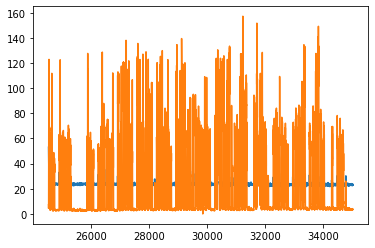

In [44]:
arima_SVR_fc = arima_SVR.predict(np.array(df_test))
# print(arimia_SVR)
plt.plot(arima_SVR_fc+fc)
plt.plot(test)

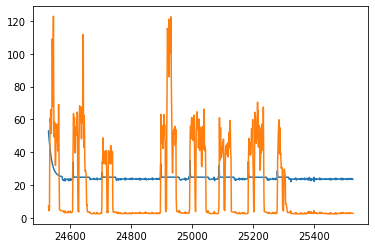

In [45]:
plt.plot(arima_SVR_fc[:1000]+fc[:1000])
plt.plot(test[:1000])

In [ ]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.0001, 0.001],
    'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVR(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 0)
optimal_params.fit(df_train, arima_fit.resid)
print(optimal_params.best_params_)

## Holt-Winter

In [27]:
hw_SVR = SVR(kernel = 'rbf', C= 0.5, gamma= 'scale')
hw_SVR.fit(df_train, holt_winter.resid)

SVR(C=0.5)

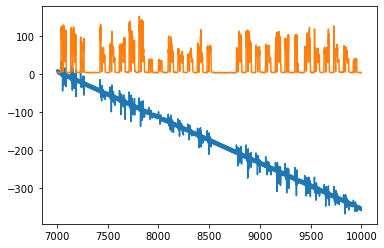

In [28]:
hw_SVR_fc = hw_SVR.predict(np.array(df_test))
# print(arimia_SVR)
plt.plot(hw_SVR_fc+hw)
plt.plot(test)

## SMV